In [1]:
#import dependencies
import pandas as pd
import os
import numpy as np
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
#name the current filepath
cwd = os.getcwd()
cwd

'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Projects\\ECHO-Marketing_git'

# iECHO (Attendance) Data

In [24]:
#name the filepath to the data
# former_file_path = "C:\\Users\\ssteffen\\Desktop\\Sam\\Email_data\\email_data.csv"
#to get the current file path, enter 'pwd' in GitBash terminal:
# /c/Users/ssteffen/University of Idaho/Storage-Boise - ECHO/Staff/Sam/Data
root_file_path = 'C:\\Users\\ssteffen\\University of Idaho\\Storage-Boise - ECHO\\Staff\\Sam\\Data\\Spreadsheets\\iECHO data\\' 
data_path_2018 = f'{root_file_path}2018_iECHO_data.csv' 
data_path_2019 = f'{root_file_path}2019_iECHO_data.csv' 
data_path_2020 = f'{root_file_path}2020_iECHO_data.csv' 
data_path_2021 = f'{root_file_path}2021_iECHO_data.csv' 
data_path_cumulative = f'{root_file_path}2018-2021_iECHO_attendance_data.csv'

# read the 2018-2021 data into separate dataframes
iecho_data_2018 = pd.read_csv(data_path_2018)
iecho_data_2019 = pd.read_csv(data_path_2019)
iecho_data_2020 = pd.read_csv(data_path_2020)
iecho_data_2021 = pd.read_csv(data_path_2021)
iecho_data_cumulative = pd.read_csv(data_path_cumulative)

# 2021 Attendance Totals

In [51]:
#clean 2021 data in preparation for merging all the dfs into one

#list 2021 data column headers
print(iecho_data_2021.columns)

Index(['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'First Name',
       'Last Name', 'Attendee Type', 'Job Title', 'Credentials', 'Specialty',
       'Attendee Street Address', 'Attendee City', 'Attendee State',
       'Attendee Zip Code', 'COPY', 'Attendee County', 'Attendee Email 1',
       'Attendee Email 2', 'Health Center Name',
       'Health Center Street Address', 'Health Center City',
       'Health Center State', 'Health Center Zip Code', 'Health Center County',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')


In [52]:
#eliminate unnecessary columns
iecho_data_2021 = iecho_data_2021.drop(['First Name',
                                        'Last Name',
                                        'COPY',
                                        'Health Center County',
                                        'Unnamed: 24', 
                                        'Unnamed: 25', 
                                        'Unnamed: 26'
                                       ], axis=1)

iecho_data_2021.head()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,Attendee State,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code
0,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Amanda Bratton,Attendee,Counselor,LPC,NaN,"366 SW 5 Ave, Ste 100",Meridian,ID,83642,Ada / 4,amandaascentbhs@gmail.com,NaN,Ascent Behavioral Health,"366 SW 5 Ave, Ste 100",Meridian,ID,83642
1,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Ashley Carvalho,Attendee,Medical Resident,MD,NaN,777 N Raymond St,Boise,ID,83704,Ada / 4,ashley.carvalho@fmridaho.org,NaN,Family Medicine Residency of Idaho - Boise,777 N Raymond St,Boise,ID,83704
2,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Brooke Reche,Attendee,Other - Not Pt. Care,Other,NaN,"2976 E State St, Ste 120-34",Eagle,ID,83616,Ada / 4,brooke@lifechangeseldercare.com,NaN,Life Changes Elder Care Consulting LLC,"2976 E State St, Ste 120-34",Eagle,ID,83616
3,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Byron Brown,Attendee,Physician,MD,"ABIM, ABIM subspecialty Pulmonary Disease",7019 N Penncross Way,Meridian,ID,83646,Ada / 4,Bevbyro@msn.com,NaN,Guest - Meridan,NaN,Meridian,ID,83642
4,1/5/2021,COVID-19 Ambulatory / Acute Care,Acute Complications of COVID-19,Deb Roman,Attendee,Physician,DO,"Family Medicine, Integrative Medicine, Osteopa...","2717 W Bannock St, Ste 200",Boise,ID,83702,Ada / 4,drdebroman@finding-health.com,NaN,Finding Health,"2717 W Bannock St, Ste 200",Boise,ID,83702


In [53]:
# view the data
iecho_data_2021.describe()

,Date,Clinic Name,Session Topic,Full Name,Attendee Type,Job Title,Credentials,Specialty,Attendee Street Address,Attendee City,Attendee State,Attendee Zip Code,Attendee County,Attendee Email 1,Attendee Email 2,Health Center Name,Health Center Street Address,Health Center City,Health Center State,Health Center Zip Code
count,7868,7868,7868,7868,7868,7864,6330,2766,6551,7868,7868,6697,7769,7868,1010,7868,6317,7808,7808,7857
unique,141,12,158,1421,12,70,302,366,583,186,42,193,98,1451,248,630,447,176,40,189
top,6/29/2021,Behavioral Health in Primary Care,COVID-19 in Idaho: Summertime Steps to Prepare...,Karley Kline,Attendee,Social Worker,MD,Psychiatry,322 E Front St,Boise,ID,83702,Ada / 4,ssteffen@uidaho.edu,echoidaho@uidaho.edu,University of Idaho - Boise,322 E Front St,Boise,ID,83702
freq,176,1369,131,118,6784,1285,1003,153,457,2643,6056,1145,3722,120,66,624,642,2700,6012,1598


### Fill in Empty Values with NaNs

In [54]:
#print the column titles as a list
# print(iecho_data_2021.columns)

#add the list to the .apply method to fill in missing data with NaNs
iecho_data_2021 = iecho_data_2021[['Date', 'Clinic Name', 'Session Topic', 'Full Name', 'Attendee Type',
       'Job Title', 'Credentials', 'Specialty', 'Attendee Street Address',
       'Attendee City', 'Attendee State', 'Attendee Zip Code',
       'Attendee County', 'Attendee Email 1', 'Attendee Email 2',
       'Health Center Name', 'Health Center Street Address',
       'Health Center City', 'Health Center State', 'Health Center Zip Code']].apply(lambda x: x.str.strip()).replace('', np.nan)

iecho_data_2021['Clinic Name'].value_counts()

Behavioral Health in Primary Care                    1369
Opioids, Pain, and Substance Use Disorders           1233
Counseling Techniques for Substance Use Disorders    1222
COVID-19                                              881
COVID-19 Ambulatory / Acute Care                      829
COVID-19 Safety for Post-Acute and Long-Term Care     666
COVID-19 Nursing Home Safety- Friday Cohort           414
Hepatitis C                                           378
Perinatal SUD                                         363
Pediatric Behavioral Health                           362
X-Waiver Training                                      89
Nursing Home COVID-19 Safety                           62
Name: Clinic Name, dtype: int64

### Change the Series Names

In [55]:
#change the series data to match the terms of email_data in preparation for a merge
# iecho_data_2021['Clinic Name'].value_counts()

#convert 'Clinic Name' column to a string
# iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(str)

#change 'Behavioral Health in Primary Care' to 'BH in PC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Behavioral Health in Primary Care', 'BH in PC')

#change 'Opioids, Pain, and Substance Use Disorders' to 'OPSUD'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Opioids, Pain, and Substance Use Disorders', 'OPSUD')

#change 'Counseling Techniques for Substance Use Disorders' to 'CTSUDs'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Counseling Techniques for Substance Use Disorders', 'CTSUDs')

#change 'COVID-19' to 'COVID'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19', 'COVID')

#change 'COVID-19 Ambulatory / Acute Care' to 'COVID'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Ambulatory / Acute Care', 'COVID')

#change 'COVID-19 Safety for Post-Acute and Long-Term Care' to 'PALTC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Safety for Post-Acute and Long-Term Care', 'PALTC')

#change 'COVID-19 Nursing Home Safety - Friday Cohort' to 'PALTC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('COVID-19 Nursing Home Safety- Friday Cohort', 'PALTC')

#change 'Hepatitis C' to 'VHLC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Hepatitis C', 'VHLC')

#change 'Perinatal SUD' to 'PSUD'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Perinatal SUD', 'PSUD')

#change 'Pediatric Behavioral Health' to 'PBH'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Pediatric Behavioral Health', 'PBH')

#change 'X-Waiver Training' to 'XWT'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('X-Waiver Training', 'XWT')

#change 'Nursing Home COVID-19 Safety' to 'PALTC'
iecho_data_2021['Clinic Name'] = iecho_data_2021['Clinic Name'].apply(lambda x: x.strip()).replace('Nursing Home COVID-19 Safety', 'PALTC')

iecho_data_2021['Clinic Name'].value_counts()

# create a df that will show the attendance count by session

COVID       1710
BH in PC    1369
OPSUD       1233
CTSUDs      1222
PALTC       1142
VHLC         378
PSUD         363
PBH          362
XWT           89
Name: Clinic Name, dtype: int64

### Create a Session Attendance Dataframe

In [56]:
#create a new df that shows each session topic by series, date, and attendance per session
session_topics_2021 = iecho_data_2021[['Clinic Name', 'Session Topic', 'Full Name','Date']]
session_attendance_raw = session_topics_2021.groupby(['Clinic Name', 'Session Topic', 'Date'])['Full Name'].count()
session_attendance_2021_df = pd.DataFrame(session_attendance_raw)
#change the name of the 'Full Name' count to 'Attendance'
session_attendance_2021_df.rename(columns = {'Full Name':'Attendance'}, inplace=True)

#reset the index
session_attendance_2021_df.reset_index(inplace=True)

session_attendance_2021_df

,Clinic Name,Session Topic,Date,Attendance
0,BH in PC,Adult ADHD: Pharmacology,9/1/2021,48
1,BH in PC,Bipolar Disorder,2/3/2021,77
2,BH in PC,Bipolar Disorder: Pharmacology,2/17/2021,66
3,BH in PC,Case Collaboration: Tips and Tricks,3/17/2021,31
4,BH in PC,Considering COVID-19 as an ACE,10/6/2021,63
5,BH in PC,Differential Diagnosis Part I: Encephalopathy ...,11/3/2021,53
6,BH in PC,Differential Diagnosis Part II: Chronic Pain a...,11/17/2021,58
7,BH in PC,Dissociative Identity Disorder,5/19/2021,79
8,BH in PC,Eating Disorders 101,6/16/2021,67
9,BH in PC,Eating Disorders Part II,7/7/2021,55


### Convert the Datatypes

In [57]:
#change the data types of inappropriate datatypes, if necessary
# session_attendance_2021_df.dtypes
session_attendance_2021_df['Date'] = pd.to_datetime(session_attendance_2021_df['Date'], format='%m/%d/%Y')
# session_attendance_2021_df.dtypes

#reorder the df
session_attendance_2021_df = session_attendance_2021_df.sort_values(by='Date')

### Plot the 2021 Attendance Totals

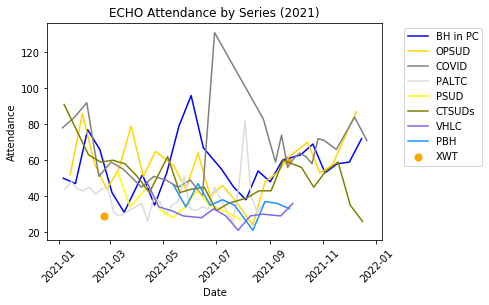

In [58]:
#plot the 2021 session attendance data using a multi-line graph

#slice the 2021 df by series
COVID_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'COVID')]
COVID_date_2021 = COVID_attendance_2021['Date'].to_list()
COVID_attendance_2021 = COVID_attendance_2021['Attendance'].to_list()

BH_PC_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'BH in PC')]
bhpc_date_2021 = BH_PC_attendance_2021['Date'].to_list()
bhpc_attendance_2021 = BH_PC_attendance_2021['Attendance'].to_list()

OPSUD_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'OPSUD')]
OPSUD_date_2021 = OPSUD_attendance_2021['Date'].to_list()
OPSUD_attendance_2021 = OPSUD_attendance_2021['Attendance'].to_list()

CTSUDs_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'CTSUDs')]
CTSUDs_date_2021 = CTSUDs_attendance_2021['Date'].to_list()
CTSUDs_attendance_2021 = CTSUDs_attendance_2021['Attendance'].to_list()

PALTC_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'PALTC')]
PALTC_date_2021 = PALTC_attendance_2021['Date'].to_list()
PALTC_attendance_2021 = PALTC_attendance_2021['Attendance'].to_list()

VHLC_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'VHLC')]
VHLC_date_2021 = VHLC_attendance_2021['Date'].to_list()
VHLC_attendance_2021 = VHLC_attendance_2021['Attendance'].to_list()

PSUD_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'PSUD')]
PSUD_date_2021 = PSUD_attendance_2021['Date'].to_list()
PSUD_attendance_2021 = PSUD_attendance_2021['Attendance'].to_list()

PBH_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'PBH')]
PBH_date_2021 = PBH_attendance_2021['Date'].to_list()
PBH_attendance_2021 = PBH_attendance_2021['Attendance'].to_list()

XWT_attendance_2021 = session_attendance_2021_df.loc[(session_attendance_2021_df['Clinic Name'] == 'XWT')]
XWT_date_2021 = XWT_attendance_2021['Date'].to_list()
XWT_attendance_2021 = XWT_attendance_2021['Attendance'].to_list()

# plot lines
plt.plot(bhpc_date_2021, bhpc_attendance_2021, label = "BH in PC", color='blue')
plt.plot(OPSUD_date_2021, OPSUD_attendance_2021, label = "OPSUD", color='gold')
plt.scatter(XWT_date_2021, XWT_attendance_2021, label = "XWT", s=50, color='orange')
plt.plot(COVID_date_2021, COVID_attendance_2021, label = "COVID", color = 'gray')
plt.plot(PALTC_date_2021, PALTC_attendance_2021, label = "PALTC", color = 'gainsboro')
plt.plot(PSUD_date_2021, PSUD_attendance_2021, label = "PSUD", color = 'yellow')
# plt.plot(syphilis_date, syphilis_attendance, label = "Syphilis", color = 'silver')

plt.plot(CTSUDs_date_2021, CTSUDs_attendance_2021, label = "CTSUDs", color = 'olive')
plt.plot(VHLC_date_2021, VHLC_attendance_2021, label = "VHLC", color = 'mediumslateblue')
plt.plot(PBH_date_2021, PBH_attendance_2021, label = "PBH", color = 'dodgerblue')

plt.title("ECHO Attendance by Series (2021)")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()